In [65]:
centers_and_clinics = {
    "Ambulance Service": 0,
    "Prestige Wellness Center": 0,
    "Dermatology and Plastic Surgery Center": 0,
    "Breast Center": 0,
    "Breast Feeding Clinic": 0,
    "Cardiac Care Unit": 0,
    "Cardiac Cath Lab": 0,
    "Cardiac Rehabilitations": 0,
    "Dental Cosmetic and Implant Center": 0,
    "Diabetes Mellitus (DM) & Endocrinology Center": 0,
    "Diagnostic Imaging Dept (JTH)": 0,
    "Ear Nose Throat Center": 0,
    "Emergency Medical Service Center": 0,
    "Emergency & Accident Dept(JTH)": 0,
    "Eye Center": 0,
    "Fertility Center": 0,
    "Gastrointestinal & Liver Center": 0,
    "Health Promotion Center": 0,
    "Hearing Speech Balance Tinnitus Center": 0,
    "Heart Center": 0,
    "Hemodialysis Center": 0,
    "Hyperbaric Oxygen Therapy": 0,
    "Diagnostic Imaging and Interventional Radiology Center": 0,
    "ICU - Trauma and Surgery": 0,
    "Intermediate Intensive Care": 0,
    "Laboratory": 0,
    "Labour Room": 0,
    "Lasik and SuperSight Surgery Center": 0,
    "Internal Medicine Center": 0,
    "Mental Health Center": 0,
    "Neonatal Intensive Care Unit (NICU)": 0,
    "Neuroscience Center": 0,
    "Nursery": 0,
    "Women Health Center": 0,
    "Oncology Center": 0,
    "Operating Room": 0,
    "Orthopedic Center": 0,
    "Pediatric Intensive Care Unit or PICU": 0,
    "Child Health Center": 0,
    "Rehabilitation Center": 0,
    "Surgery Center": 0,
    "Urology Center": 0,
    "Wound Care Unit": 0,
    "Hospital Director Office": 0,
    "Medical Staff Organization": 0,
    "Anesthetic": 0,
    "BPH Clinic : Bangsare": 0,
    "BPH Clinic : Bo Win": 0,
    "BPH Clinic : Kreua Sahaphat": 0,
    "ICU Medicine": 0,
    "ICU Neurosciences": 0,
    "KOH LARN Clinic": 0,
    "Nutrition Therapeutic": 0,
    "U-Tapao Clinic": 0,
    "Jomtien Hospital": 0,
}
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
folder_path = './csv_folder'
total_all_col_rec = 0
total_all_col = 0
lang_count_rec = 0
lang_count = 0
recommended_files = glob.glob(os.path.join(folder_path, "*appointment-recommended*.csv"))
langs = [
    "ar", "de", "en", "ru", "th", "zh"
]
lang_summary = {lang: {"appointment count": 0, "appointment recommended count": 0} for lang in langs}
data_frame_for_plot = {
    "lang": [],
    "appointment count": [],
    "appointment recommended count": []
}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

folder_path = "./csv_folder"
langs = ["ar", "de", "en", "ru", "th", "zh"]
lang_summary = {lang: {"appointment count": 0, "appointment recommended count": 0} for lang in langs}
total_all_col_rec, total_all_col = 0, 0

recommended_files = glob.glob(os.path.join(folder_path, "*appointment-recommended*.csv"))
normal_files = [f for f in glob.glob(os.path.join(folder_path, "*appointment*.csv"))
                if "appointment-recommended" not in os.path.basename(f)]

# อ่านไฟล์ recommended
for file in recommended_files:
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip().str.replace('\ufeff', '')
    col_name = df.columns[1]
    count = len(df[col_name])
    total_all_col_rec += count

    for lang in langs:
        if f"-{lang}" in file:
            lang_summary[lang]["appointment recommended count"] += count
            break

# อ่านไฟล์ปกติ
for file in normal_files:
    df = pd.read_csv(file)
    df.columns = df.columns.str.strip().str.replace('\ufeff', '')
    col_name = df.columns[1]
    count = len(df[col_name])
    total_all_col += count

    for lang in langs:
        if f"-{lang}" in file:
            lang_summary[lang]["appointment count"] += count
            break

# เติมข้อมูลใน DataFrame สำหรับ plot
data_frame_for_plot = {
    "lang": [],
    "appointment count": [],
    "appointment recommended count": []
}

for lang in langs:
    data_frame_for_plot["lang"].append(lang)
    data_frame_for_plot["appointment count"].append(lang_summary[lang]["appointment count"])
    data_frame_for_plot["appointment recommended count"].append(lang_summary[lang]["appointment recommended count"])

# เพิ่ม total
data_frame_for_plot["lang"].append("total")
data_frame_for_plot["appointment count"].append(total_all_col)
data_frame_for_plot["appointment recommended count"].append(total_all_col_rec)

# ✅ สร้าง DataFrame ก่อนนำไป plot
df_plot = pd.DataFrame(data_frame_for_plot)
# แยก total ออกก่อน (ถ้ามี)
df_total = df_plot[df_plot['lang'] == 'total']
df_plot = df_plot[df_plot['lang'] != 'total']

# สร้างคอลัมน์รวม
df_plot['total'] = df_plot['appointment count'] + df_plot['appointment recommended count']

# เรียงลำดับตามค่ารวม
df_plot = df_plot.sort_values(by='total', ascending=False).reset_index(drop=True)

# ลบคอลัมน์ total ที่ใช้ช่วยเรียง
df_plot = df_plot.drop(columns=['total'])

# ต่อแถว total กลับ
df_plot = pd.concat([df_plot, df_total], ignore_index=True)


# --- Plot ---
x = df_plot['lang']
width = 0.35
x_pos = range(len(x))

plt.figure(figsize=(10,6))
bars1 = plt.bar(x_pos, df_plot['appointment count'], width=width, label='Appointment', color='skyblue')
bars2 = plt.bar([p + width for p in x_pos], df_plot['appointment recommended count'], width=width, label='Recommended', color='orange')

# เพิ่มตัวเลขบนแท่งกราฟ
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, str(int(height)), ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, str(int(height)), ha='center', va='bottom')

plt.xticks([p + width / 2 for p in x_pos], x)
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Appointment vs Recommended by Language")
plt.legend()
plt.tight_layout()

print(df_plot)
plt.show()
df_plot.to_csv("summary_report.csv", index=False)


lang: ar


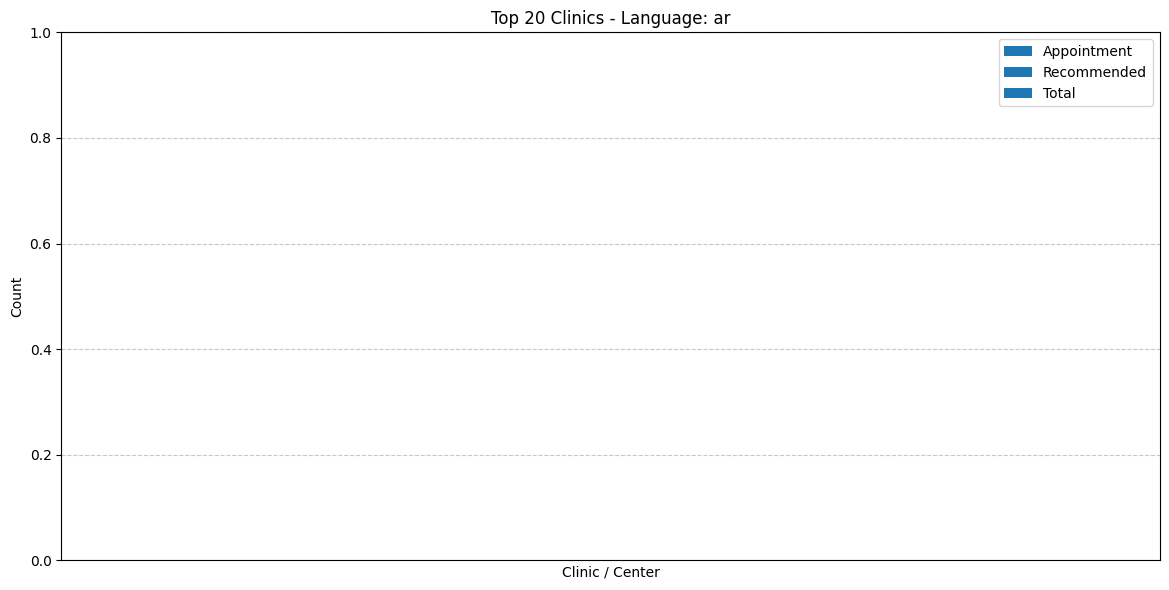

lang: de


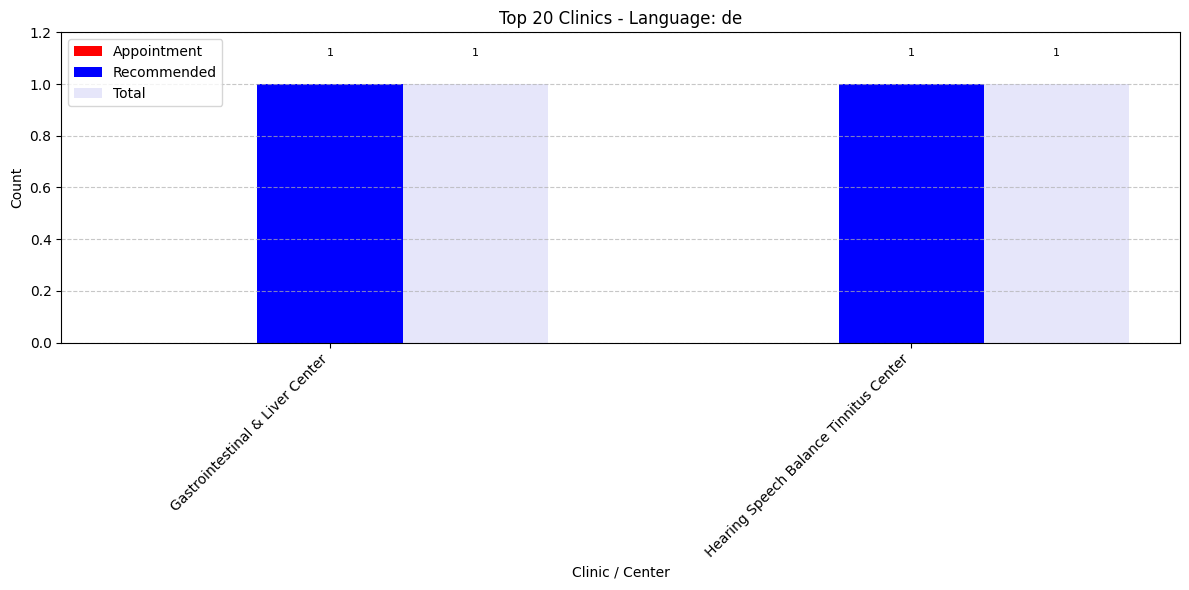

lang: en


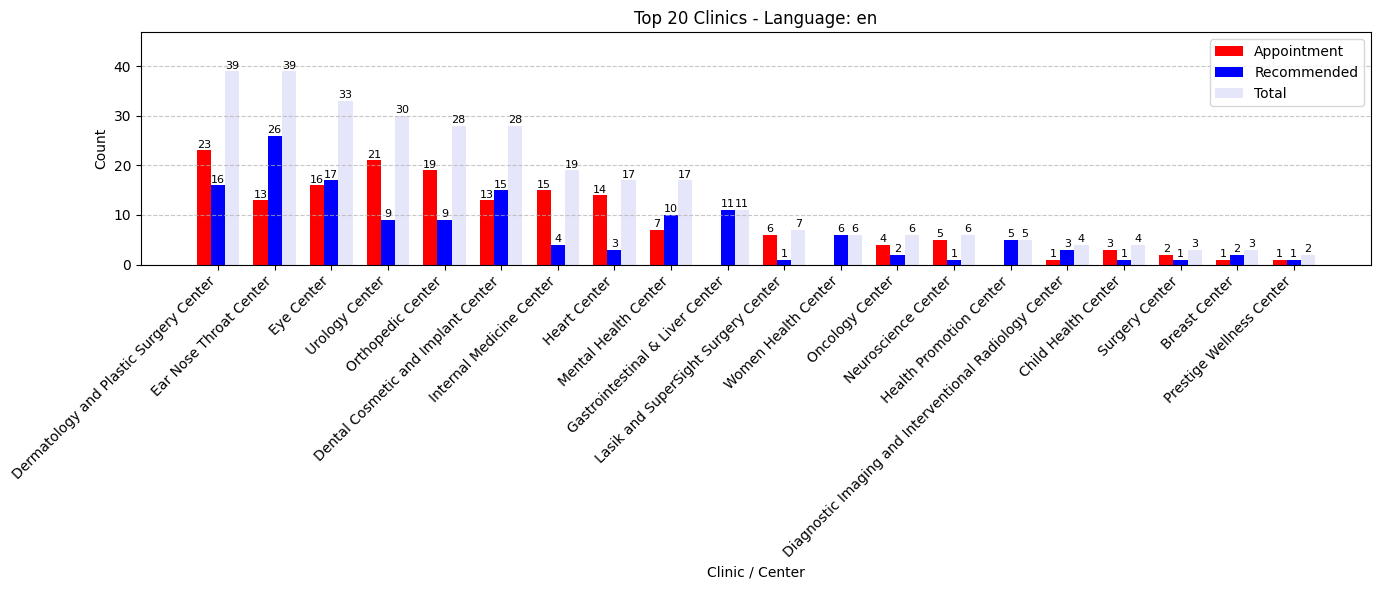

lang: ru


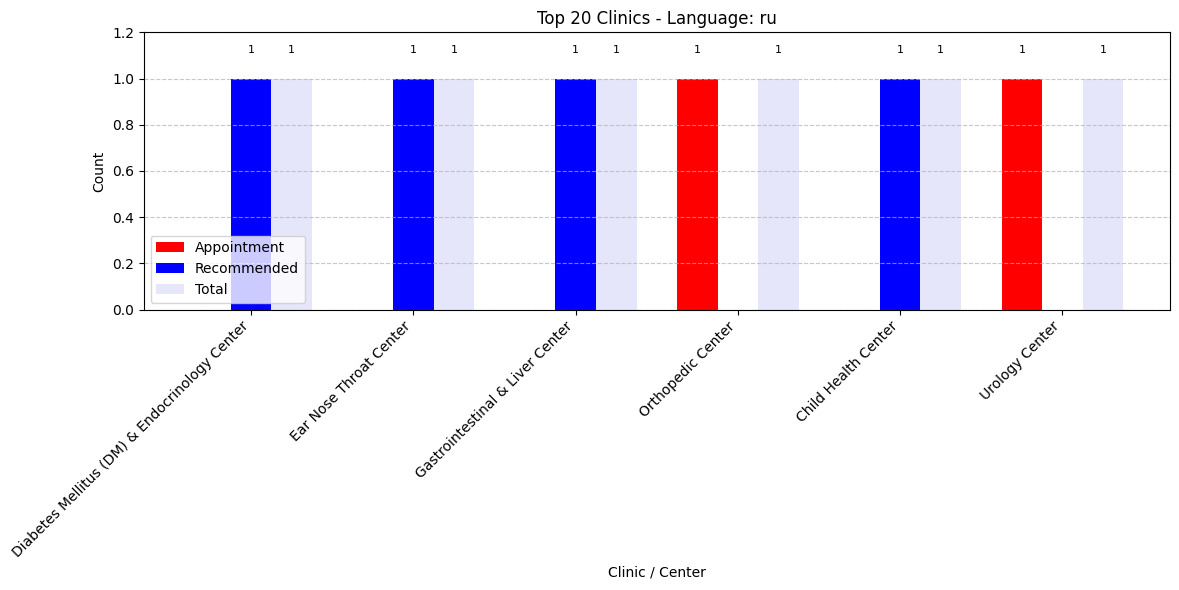

lang: th


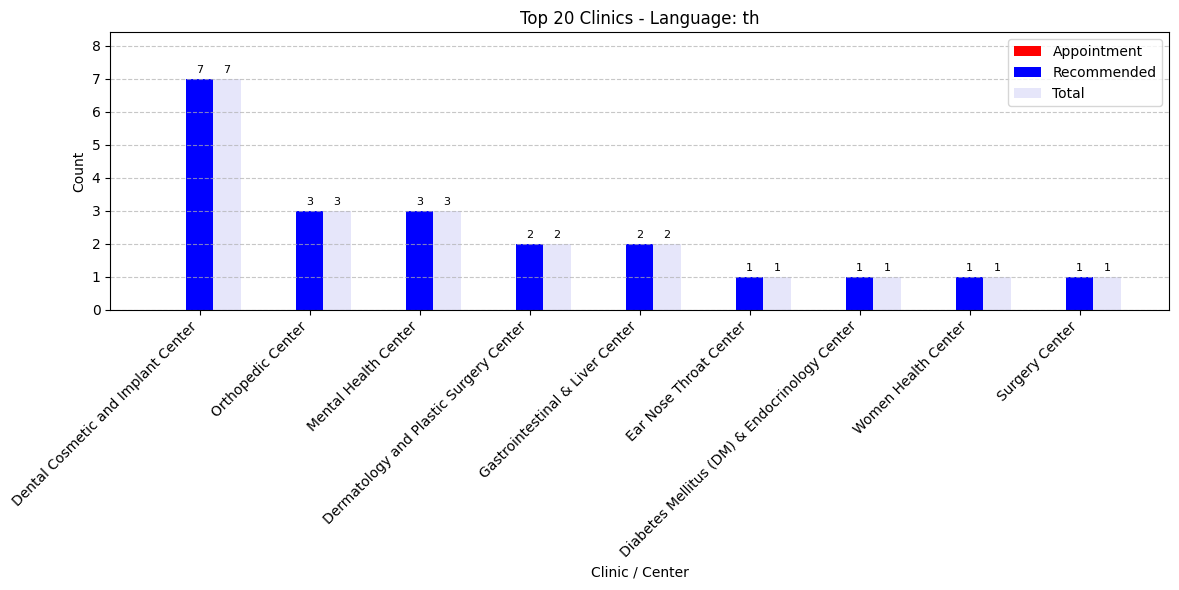

lang: zh-hans


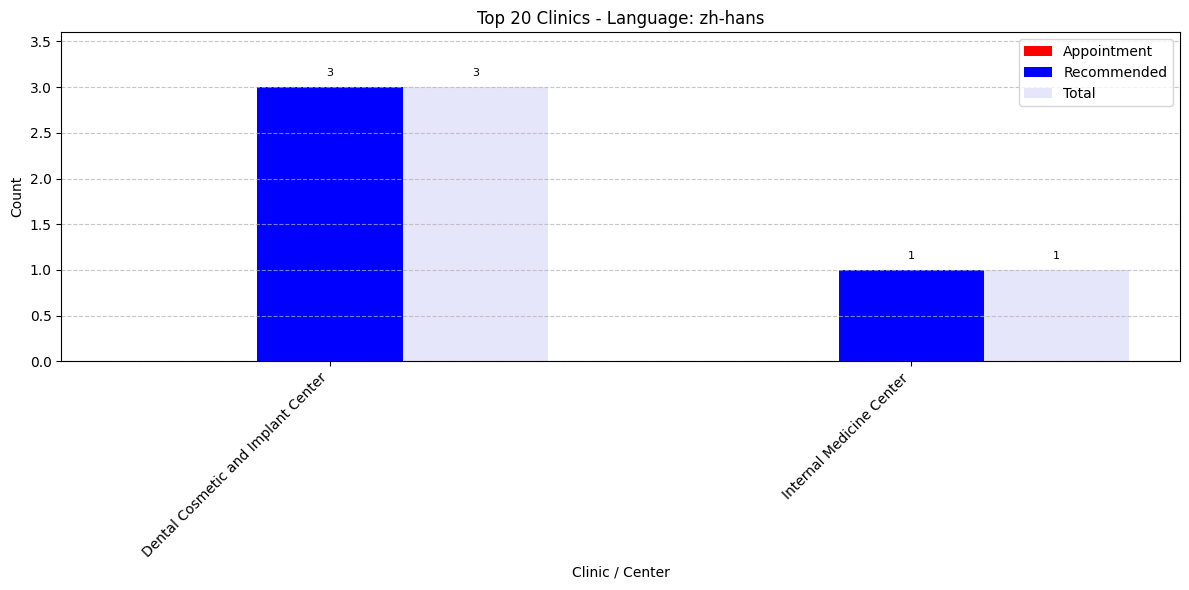

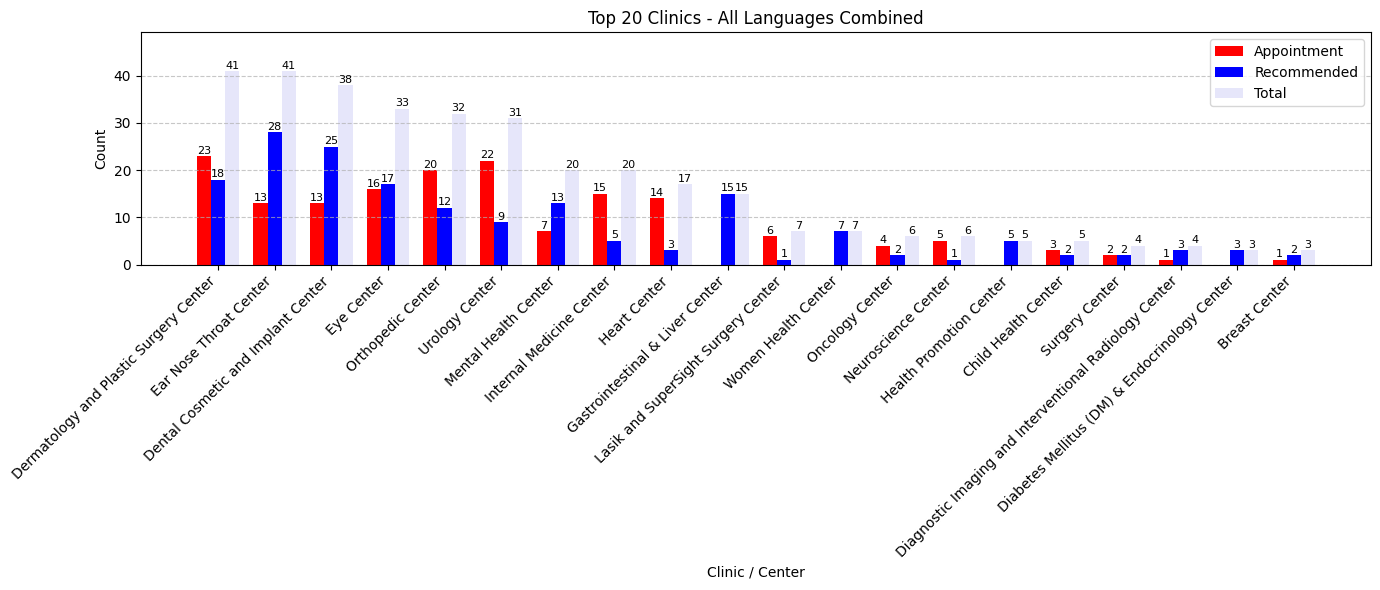

In [69]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

langs = ["ar", "de", "en", "ru", "th", "zh-hans"]  # ภาษาที่ต้องการ
folder_path = "./csv_folder"

total_normal_counts = {}
total_recommended_counts = {}

for lang in langs:
    recommended_counts = {k: 0 for k in centers_and_clinics}
    normal_counts = {k: 0 for k in centers_and_clinics}

    print('lang:', lang)

    # --- อ่านไฟล์ recommended ---
    recommended_files = glob.glob(os.path.join(folder_path, f"appointment-recommended-{lang}-*.csv"))
    for file in recommended_files:
        df = pd.read_csv(file)
        df.columns = df.columns.str.strip().str.replace('\ufeff', '')
        col_name = df.columns[1]
        for dept in df[col_name].astype(str).str.strip():
            if dept in recommended_counts:
                recommended_counts[dept] += 1

    # --- อ่านไฟล์ normal ---
    normal_files = glob.glob(os.path.join(folder_path, f"appointment-{lang}-*.csv"))
    normal_files = [f for f in normal_files if "recommended" not in os.path.basename(f)]
    for file in normal_files:
        df = pd.read_csv(file)
        df.columns = df.columns.str.strip().str.replace('\ufeff', '')
        col_name = df.columns[1]
        for dept in df[col_name].astype(str).str.strip():
            if dept in normal_counts:
                normal_counts[dept] += 1

    # รวมผลเข้า dict รวม
    for k in centers_and_clinics:
        total_normal_counts[k] = total_normal_counts.get(k, 0) + normal_counts.get(k, 0)
        total_recommended_counts[k] = total_recommended_counts.get(k, 0) + recommended_counts.get(k, 0)

    # --- สร้าง DataFrame และกรอง ---
    df_lang = pd.DataFrame([
        {
            "clinic": k,
            "appointment count": normal_counts.get(k, 0),
            "recommended count": recommended_counts.get(k, 0),
            "total": normal_counts.get(k, 0) + recommended_counts.get(k, 0)
        }
        for k in centers_and_clinics
    ])
    df_lang = df_lang[df_lang["total"] > 0].sort_values(by="total", ascending=False).head(20)
    df_lang.to_csv(f"./top_20_clinic/top_20_clinic_summary_{lang}.csv", index=False, encoding='utf-8-sig')
    # --- Plot per language with Total bar ---
    x = np.arange(len(df_lang))
    width = 0.25  # แบ่งแท่งเป็น 3 กลุ่ม

    plt.figure(figsize=(max(12, len(df_lang)*0.7), 6))

    bars1 = plt.bar(x - width, df_lang["appointment count"], width=width, label='Appointment', color='red')
    bars2 = plt.bar(x, df_lang["recommended count"], width=width, label='Recommended', color='blue')
    bars3 = plt.bar(x + width, df_lang["total"], width=width, label='Total', color='Lavender')

    plt.xticks(x, df_lang["clinic"], rotation=45, ha='right')

    plt.xlabel("Clinic / Center")
    plt.ylabel("Count")
    plt.title(f"Top 20 Clinics - Language: {lang}")
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # เช็คค่า max_height ก่อนตั้ง ylim
    if not df_lang.empty:
        max_height = max(
            df_lang["total"].dropna().max(),
            df_lang["appointment count"].dropna().max(),
            df_lang["recommended count"].dropna().max()
        )
        plt.ylim(0, max_height * 1.2)
    else:
        plt.ylim(0, 1)

    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8)

    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8)

    for bar in bars3:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8)

    plt.savefig(f"./top_20_clinic/top_20_clinic_summary_{lang}.png", dpi=300, bbox_inches='tight')
    plt.show()

# --- สร้าง DataFrame รวม ---
df_total = pd.DataFrame([
    {
        "clinic": k,
        "appointment count": total_normal_counts.get(k, 0),
        "recommended count": total_recommended_counts.get(k, 0),
        "total": total_normal_counts.get(k, 0) + total_recommended_counts.get(k, 0)
    }
    for k in centers_and_clinics
])
df_total = df_total[df_total["total"] > 0].sort_values(by="total", ascending=False).head(20)
df_total.to_csv("./top_20_clinic/top_20_clinic_summary_all_languages.csv", index=False, encoding='utf-8-sig')
# --- Plot กราฟรวม (3 บาร์) ---
x = np.arange(len(df_total))
width = 0.25

plt.figure(figsize=(max(12, len(df_total)*0.7), 6))

bars1 = plt.bar(x - width, df_total["appointment count"], width=width, label='Appointment', color='red')
bars2 = plt.bar(x, df_total["recommended count"], width=width, label='Recommended', color='blue')
bars3 = plt.bar(x + width, df_total["total"], width=width, label='Total', color='Lavender')

plt.xticks(x, df_total["clinic"], rotation=45, ha='right')

plt.xlabel("Clinic / Center")
plt.ylabel("Count")
plt.title("Top 20 Clinics - All Languages Combined")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# เช็คค่า max_height_total ก่อนตั้ง ylim
if not df_total.empty:
    max_height_total = max(
        df_total["total"].dropna().max(),
        df_total["appointment count"].dropna().max(),
        df_total["recommended count"].dropna().max()
    )
    plt.ylim(0, max_height_total * 1.2)
else:
    plt.ylim(0, 1)

for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8)

for bar in bars3:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=8)

plt.savefig("./top_20_clinic/top_20_clinic_summary_all_languages.png", dpi=300, bbox_inches='tight')
plt.show()
